# Basic Operations (Eager Execution)
---
In thie notebook, I'll describe basic Tensor operations using "Eager Execution".
- Vector / Matrix
- Matrix Operation

__packages:__

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow version: ", tf.__version__)
print("numpy version: ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)

tf.enable_eager_execution()

tensorflow version:  1.15.2
numpy version:  1.18.2
matplotlib version:  3.2.0


We can use define-by-run mode just declaring `tf.enable_eager_execution()`.  
Note that we can't mix `tf.Session()` and `tf.enable_eager_execution()` in the same process.  
So, we shoud declare `tf.enable_eager_execution()` at first of the program.

## Vector / Matrix
We can use numpy like functions to create vectors or tensors.

### Numpy like functions
```python
tf.zeros(shape, dtype=tf.float32, name=None)
```
```python
tf.ones(shape, dtype=tf.float32, name=None)
```
```python
tf.zeros_like(tensor, dtype=None, name=None, optimize=True)
```
```python
tf.ones_like(tensor, dtype=None, name=None, optimize=True)
```
```python
tf.linspace(start, stop, num, name=None)
```
```python
tf.range(start, limit=None, delta=1, dtype=None, name='range')
```

In [2]:
data1 = tf.zeros([2,3])
data2 = tf.ones([2,3])
data3 = tf.zeros_like(data2)
data4 = tf.ones_like(data1)

print("--- data1 ---")
print(data1)
print("--- data2 ---")
print(data2)
print("--- data3 ---")
print(data3)
print("--- data4 ---")
print(data4)

--- data1 ---
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
--- data2 ---
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
--- data3 ---
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
--- data4 ---
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


### [tf.random](https://www.tensorflow.org/api_docs/python/tf/random) examples 
```python
tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
```
```python
tf.random.normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
```
```python
tf.random.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
```

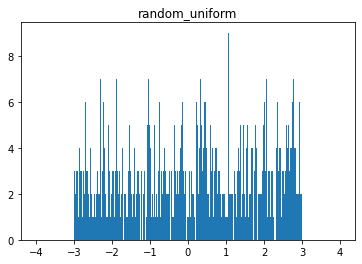

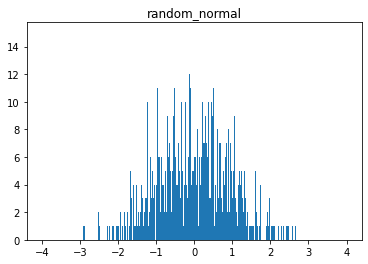

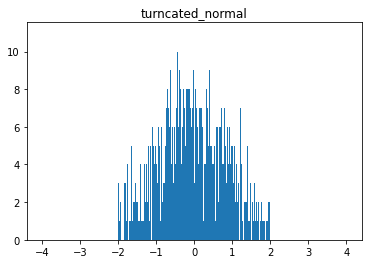

In [5]:
uniform = tf.random_uniform((1000, ), minval=-3, maxval=3)
normal = tf.random_normal((1000, ))
turncated_normal = tf.truncated_normal((1000, ))

def plot(title, values, hist_range=(-4, 4), bins=500):
    plt.title(title)
    plt.hist(values, range=hist_range, bins=bins)
    plt.show()

# We can get tensors as numpy array.
plot("random_uniform", uniform.numpy())
plot("random_normal", normal.numpy())
plot("turncated_normal", turncated_normal.numpy())

```python
tf.random.shuffle(value, seed=None, name=None)
tf.random_shuffle(value, seed=None, name=None)
```
```python
tf.random.crop(value, size, seed=None, name=None)
tf.random_crop(value, size, seed=None, name=None)
```

In [6]:
val = tf.constant([1,2,3,4,5], dtype=tf.int32)
shuffle = tf.random_shuffle(val)
crop = tf.random_crop(val, (3,))

with tf.Session() as sess:
    print("original: ", val)
    print("shuffle: ", shuffle)
    print("crop: ", crop)

original:  tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
shuffle:  tf.Tensor([5 1 2 3 4], shape=(5,), dtype=int32)
crop:  tf.Tensor([3 4 5], shape=(3,), dtype=int32)


### Dimension operations
```python
# Removes dimensions of size 1 from the shape of a tensor. 
tf.squeeze(input, axis=None, name=None, squeeze_dims=None)
```
```python
# Inserts a dimension of 1 into a tensor's shape. (deprecated arguments)
tf.expand_dims(input, axis=None, name=None, dim=None)
```

In [7]:
np_array1 = np.array([[1,2,3,4],[5,6,7,8]])
np_array2 = np.array([[[1,2,3,4],[5,6,7,8]]])

print("np_array1 shape: ", np_array1.shape)
print("np_array2 shape: ", np_array2.shape)

# We can feed numpy array into tensor ops
squeeze = tf.squeeze(np_array2)
expand = tf.expand_dims(np_array2, axis=0)

print("np_array1:\n", np_array1)
print("np_array2:\n", np_array2)
print("squeeze(val2)\n", squeeze)
print("expand_dims(val1)\n", expand)

np_array1 shape:  (2, 4)
np_array2 shape:  (1, 2, 4)
np_array1:
 [[1 2 3 4]
 [5 6 7 8]]
np_array2:
 [[[1 2 3 4]
  [5 6 7 8]]]
squeeze(val2)
 tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int64)
expand_dims(val1)
 tf.Tensor(
[[[[1 2 3 4]
   [5 6 7 8]]]], shape=(1, 1, 2, 4), dtype=int64)


## Matrix Operation

In [8]:
A_mat_tsr = tf.constant([[1,2,3],[4,5,6]])
B_mat_tsr = tf.constant([[7,8,9],[10,11,12]])
C_mat_tsr = tf.constant([[1,2],[3,4],[5,6]])

### Add -- element wise operation

In [9]:
print(tf.add(A_mat_tsr, B_mat_tsr))
print(A_mat_tsr + B_mat_tsr)

tf.Tensor(
[[ 8 10 12]
 [14 16 18]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 8 10 12]
 [14 16 18]], shape=(2, 3), dtype=int32)


### Subtract -- element wise operation

In [10]:
print(tf.subtract(A_mat_tsr, B_mat_tsr))
print(A_mat_tsr - B_mat_tsr)

tf.Tensor(
[[-6 -6 -6]
 [-6 -6 -6]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[-6 -6 -6]
 [-6 -6 -6]], shape=(2, 3), dtype=int32)


### Multiply -- element wise operation

In [11]:
print(tf.multiply(A_mat_tsr, B_mat_tsr))
print(A_mat_tsr * B_mat_tsr)

tf.Tensor(
[[ 7 16 27]
 [40 55 72]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 7 16 27]
 [40 55 72]], shape=(2, 3), dtype=int32)


### Divide -- element wise operation

In [12]:
print(tf.divide(A_mat_tsr, B_mat_tsr))
print(A_mat_tsr / B_mat_tsr)

tf.Tensor(
[[0.14285714 0.25       0.33333333]
 [0.4        0.45454545 0.5       ]], shape=(2, 3), dtype=float64)
tf.Tensor(
[[0.14285714 0.25       0.33333333]
 [0.4        0.45454545 0.5       ]], shape=(2, 3), dtype=float64)


### Matrix multiplication

In [13]:
matrix_dot = tf.matmul(A_mat_tsr,C_mat_tsr)
print(tf.matmul(A_mat_tsr,C_mat_tsr))

tf.Tensor(
[[22 28]
 [49 64]], shape=(2, 2), dtype=int32)
